<a href="https://colab.research.google.com/github/uyoung-jeong/2020_deep_learning_study/blob/master/01_LinearRegression_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
import tensorflow as tf

In [0]:
# generate data
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

In [0]:
# Visualization function
def plot_data(X,y,w):
  plt.scatter(X, y) # show original data
  plt.plot(X, w*X, c='red') # use solution
  plt.show()

In [0]:
# store the rank and the numer of columns of the matrix
n = X.shape[1] # number of columns
r = np.linalg.matrix_rank(X) # rank

# use singular value decomposition
U, sigma, VT = np.linalg.svd(X, full_matrices=False)
V = VT.T

# derive D^+ from sigma
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

# moore-penrose pseudoinverse of X
X_plus = V.dot(D_plus).dot(U.T)

w = X_plus.dot(y)

error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2

print('w: {}'.format(w))
print('error: {}'.format(error))

w: [89.22901347]
error: 888.9637001387936


In [0]:
# numpy function to get least squares solution
solution, residuals, rank, singular = np.linalg.lstsq(X, y)
print('w: {}'.format(solution))
print('error: {}'.format(residuals))
np_w = w

w: [89.22901347]
error: [888.96370014]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


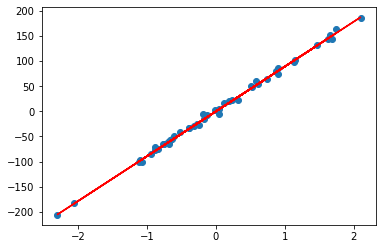

In [0]:
# visualization
plot_data(X,y,w)

w: 89.25863635216471


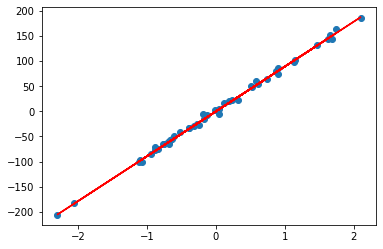

In [0]:
# using scikit-learn implementation of linear regression
lr = LinearRegression()
lr.fit(X, y)
w = lr.coef_[0]
print('w: {}'.format(w))
sk_w = w

# plot line
plot_data(X,y,w)

coef: [73.60064637]
w: 73.60064636569076


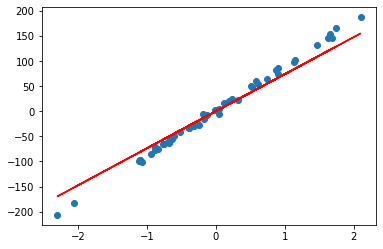

In [0]:
# Ridge regression
alpha = 10 # regularization strength
rr = Ridge(alpha=alpha)
rr.fit(X,y)
w = rr.coef_[0]
print('coef: {}'.format(rr.coef_))
print('w: {}'.format(w))
sk_ridge_w = w

# plot line
plot_data(X,y,w)

fast method: [89.22901347]
not-fast method: [89.22901347]


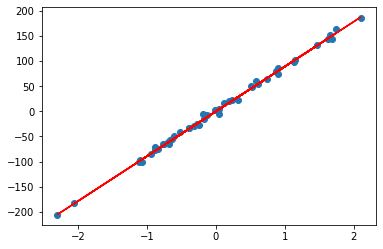

In [0]:
# Tensorflow implementation
X_tf = tf.convert_to_tensor(X)
y_tf = tf.convert_to_tensor(np.expand_dims(y, axis=1))
tf_alpha = 0
output_fast = tf.linalg.lstsq(X_tf, y_tf, l2_regularizer=tf_alpha, fast=True)
output_not_fast = tf.linalg.lstsq(X_tf, y_tf, l2_regularizer=tf_alpha, fast=False)

with tf.Session():
  output = output_fast.eval()
  print('fast method: {}'.format(output.flatten()))
  output = output_not_fast.eval()
  print('not-fast method: {}'.format(output.flatten()))
  w = output.flatten()
plot_data(X,y,w)
